In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_index = np.load('../Data/NewData/NewNewData/train_index.npy').astype(int)
test_index = np.load('../Data/NewData/NewNewData/test_index.npy').astype(int)

train_feature = np.load('../Data/NewData/NewNewData/train_D21D12.npy')
test_feature = np.load('../Data/NewData/NewNewData/test_D21D12.npy')

S_train = np.load('../Data/simu_20000_0.1_90_140_train.npy')[train_index, -2]
S_test = np.load('../Data/simu_10000_0.1_141_178_test.npy')[test_index, -2]

train_index.shape, test_index.shape

((3879,), (1909,))

In [3]:
np.corrcoef(S_train, train_feature)[0, 1], np.corrcoef(S_test, test_feature)[0, 1]

(-0.9807435270649468, -0.9716161609777856)

In [4]:
from sklearn.ensemble import RandomForestRegressor

print(train_feature.shape)
regressor = RandomForestRegressor(max_depth = 2, n_estimators = 3000, random_state = 42)

regressor.fit(train_feature.reshape(-1, 1), S_train)

y_pred = regressor.predict(test_feature.reshape(-1, 1))

np.mean(np.abs(y_pred - S_test))

(3879,)


25.29699911233558

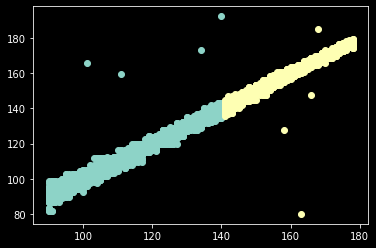

In [5]:
plt.scatter(S_train, 220 - 100 *  train_feature)
plt.scatter(S_test, 220 - 100 * test_feature)

In [7]:
from sklearn.linear_model import LinearRegression as LR  # 线性回归
# from sklearn.model_selection import train_test_split     # 划分训练测试集
# from sklearn.datasets import fetch_california_housing as fch  # 加利福尼亚房屋价格数据集
# import pandas as pd

# 3.建模
reg = LR().fit(train_feature.reshape(-1, 1), S_train)
yhat = reg.predict(test_feature.reshape(-1, 1))
np.mean(np.abs(yhat - S_test))


1.5933740839850326